# spaCy and NLTK

https://www.youtube.com/watch?v=h2kBNEShsiE&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=7

https://www.youtube.com/watch?v=hKK59rfpXL0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=9


spaCy: object-oriented

NLTK: string processing library

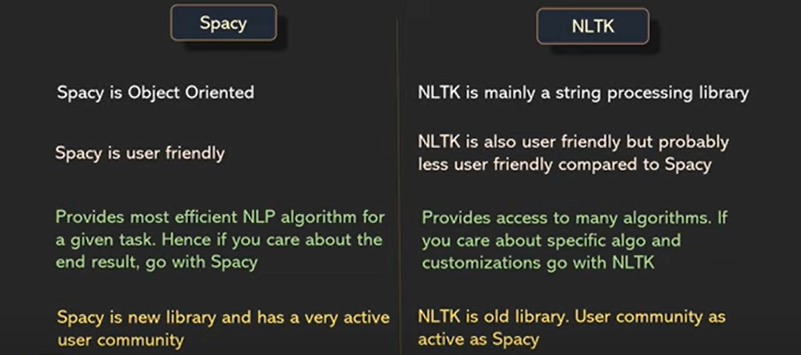

## Sentence and word tokenization in spaCy and NLTK

In [74]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [75]:
# make an object (doc) from the string
doc = nlp('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

In [76]:
# sentence tokenization in spacy
# spacy splits doc into sentences, not just using .

# iterate over the object with its sents attribute
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chaat of delhi


In [77]:
# word tokenization in spacy
for sentence in doc.sents:
    for word in sentence:
        print(word)

Dr.
Strange
loves
pav
bhaji
of
mumbai
.
Hulk
loves
chaat
of
delhi


In [78]:
import nltk
# nltk.download()
# nltk.download('punkt')

In [79]:
# sentence tokenization in nltk
from nltk.tokenize import sent_tokenize # there are many tokenizer options to import;
# nltk allows for customization

# pass string (not object) directly to sentence tokenizer
sent_tokenize('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

['Dr.', 'Strange loves pav bhaji of mumbai.', 'Hulk loves chaat of delhi']

In [80]:
from nltk.tokenize import word_tokenize

# pass string (not object) directly to word tokenizer
word_tokenize('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

['Dr',
 '.',
 'Strange',
 'loves',
 'pav',
 'bhaji',
 'of',
 'mumbai',
 '.',
 'Hulk',
 'loves',
 'chaat',
 'of',
 'delhi']

## spaCy pipeline

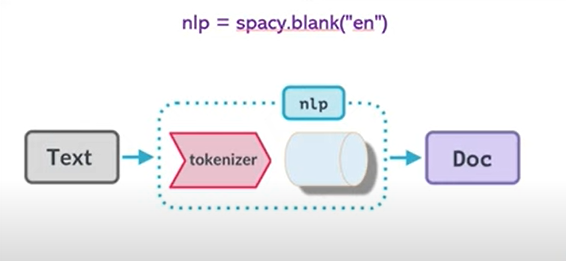

- blank spaCy pipeline gets tokenizer by default, but nothing else
- converts text to a doc object

In [81]:
nlp = spacy.blank('en')

doc = nlp("Captain america ate 100$ of samosa. THen he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
THen
he
said
I
can
do
this
all
day
.


In [82]:
# nlp.pipe_names is blank because there is nothing in the pipeline
nlp.pipe_names

[]

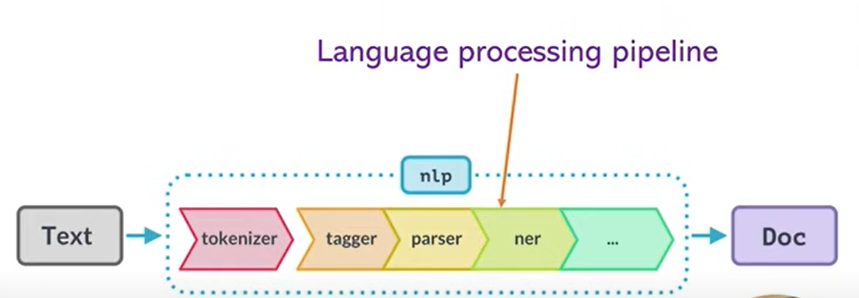

In [83]:
# to download pre-trained pipeline (can find options in spaCy's documentation)
# in git bash:
# python -m spacy download <name of pipeline> (ex. en_core_web_sm)

nlp = spacy.load('en_core_web_sm')

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [84]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x21a1f7033a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x21a1f6c6d00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x21a1b7435f0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x21a1f8593c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x21a1f7b0580>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x21a1b743820>)]

In [85]:
# now can access more information for each token in doc with trained pipeline

doc = nlp("Captain america ate 100$ of samosa. THen he said I can do this all day.")

for token in doc:
    print(token, token.pos_, token.lemma_)

# tagger gives you pos
# lemmatizer gives you lemma

Captain PROPN Captain
america PROPN america
ate VERB eat
100 NUM 100
$ NUM $
of ADP of
samosa NOUN samosa
. PUNCT .
THen ADV then
he PRON he
said VERB say
I PRON I
can AUX can
do VERB do
this PRON this
all DET all
day NOUN day
. PUNCT .


In [86]:
# ner gives you named entities

doc = nlp('Tesla Inc is going to acquire twitter for $45 billion')

for ent in doc.ents:
    print(ent.text, ent.label_, spacy.explain(ent.label_))

Tesla Inc ORG Companies, agencies, institutions, etc.
$45 billion MONEY Monetary values, including unit


In [87]:
# to display a doc in a pretty way
from spacy import displacy

displacy.render(doc, style = 'ent')

In [88]:
# to add a component of a pipeline (like ner, tagger, lemmatizer, etc.) to a 
# blank pipeline (so the pipeline only has what you need):

# load pipeline with the component you want
source_nlp = spacy.load('en_core_web_sm')

# load a blank pipeline
nlp = spacy.blank('en')

# add the component you want to the blank pipeline
nlp.add_pipe('ner', source = source_nlp)

# check
nlp.pipe_names

['ner']

## Stemming and Lemmatization

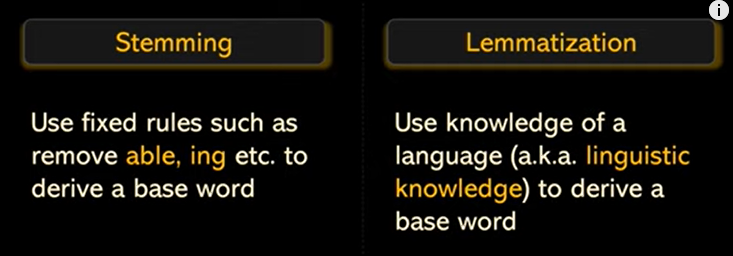

- spaCy only supports lemmatization (not stemming)
- NLTK supports both stemming and lemmatization

In [89]:
# stemming in nltk

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ['eating', 'eats', 'eat', 'ate', 'adjustable', 'rafting', 'ability', 'meeting', 'better']

for word in words:
    print(word, stemmer.stem(word))

eating eat
eats eat
eat eat
ate ate
adjustable adjust
rafting raft
ability abil
meeting meet
better better


In [90]:
# lemmatization in spaCy
nlp = spacy.load('en_core_web_sm')

doc = nlp('eating eats eat ate adjustable rafting ability meeting better')

for token in doc:
    print(token, token.lemma_, token.lemma)

# lemma_ will give the lemma
# lemma will give the unique hash of the lemma

eating eat 9837207709914848172
eats eat 9837207709914848172
eat eat 9837207709914848172
ate eat 9837207709914848172
adjustable adjustable 6033511944150694480
rafting raft 7154368781129989833
ability ability 11565809527369121409
meeting meeting 14798207169164081740
better well 4525988469032889948


In [91]:
doc = nlp("Mando talked for 3 hours although talking isn't his thing he became talkative")

for token in doc:
    print(token, token.lemma_, token.lemma)

Mando Mando 7837215228004622142
talked talk 13939146775466599234
for for 16037325823156266367
3 3 602994839685422785
hours hour 9748623380567160636
although although 343236316598008647
talking talk 13939146775466599234
is be 10382539506755952630
n't not 447765159362469301
his his 2661093235354845946
thing thing 2473243759842082748
he he 1655312771067108281
became become 12558846041070486771
talkative talkative 13364764166055324990


In [92]:
# check out the components of the spacy pipeline we're using
nlp.pipe_names

# attribute_ruler assigns an attribute to a particular token
# this can be customized/modified as you want

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [93]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted brother.")

for token in doc:
    print(token.text, token.lemma_)

Bro bro
, ,
you you
wanna wanna
go go
? ?
Brah Brah
, ,
do do
n't not
say say
no no
! !
I I
am be
exhausted exhausted
brother brother
. .


In [94]:
# if you know 'bro' and 'brah' should have the same lemma, you can change it

# get attribute_ruler from pipeline
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{'TEXT': 'Bro'}],[{'TEXT': 'Brah'}]], {'LEMMA': 'brother'})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted brother.")

for token in doc:
    print(token.text, token.lemma_)

Bro brother
, ,
you you
wanna wanna
go go
? ?
Brah brother
, ,
do do
n't not
say say
no no
! !
I I
am be
exhausted exhausted
brother brother
. .


In [95]:
doc[0]

Bro

In [96]:
doc[0].lemma_

'brother'

## Part of Speech in spaCy

In [97]:
import spacy

In [98]:
nlp = spacy.load("en_core_web_sm")

In [99]:
doc = nlp("Elon flew to mars yesterday. He carried biryani masala with him")

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Elon PROPN 96 proper noun
flew VERB 100 verb
to ADP 85 adposition
mars NOUN 92 noun
yesterday NOUN 92 noun
. PUNCT 97 punctuation
He PRON 95 pronoun
carried VERB 100 verb
biryani ADJ 84 adjective
masala NOUN 92 noun
with ADP 85 adposition
him PRON 95 pronoun


In [100]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [101]:
doc = nlp("Wow! Dr. Strange made $265 million on the very first day.")

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_), token.tag_,
         spacy.explain(token.tag_))
    
# tag_ is a further categorization of pos_; for example, see below pos_ is VERB
# and tag_ is VBD (verb, past tense)

Wow INTJ 91 interjection UH interjection
! PUNCT 97 punctuation . punctuation mark, sentence closer
Dr. PROPN 96 proper noun NNP noun, proper singular
Strange PROPN 96 proper noun NNP noun, proper singular
made VERB 100 verb VBD verb, past tense
$ SYM 99 symbol $ symbol, currency
265 NUM 93 numeral CD cardinal number
million NUM 93 numeral CD cardinal number
on ADP 85 adposition IN conjunction, subordinating or preposition
the DET 90 determiner DT determiner
very ADV 86 adverb RB adverb
first ADJ 84 adjective JJ adjective (English), other noun-modifier (Chinese)
day NOUN 92 noun NN noun, singular or mass
. PUNCT 97 punctuation . punctuation mark, sentence closer


In [102]:
doc = nlp("He quits the job.")

print(doc[1])
print(doc[1].text, doc[1].tag_, spacy.explain(doc[1].tag_))

quits
quits VBZ verb, 3rd person singular present


In [103]:
doc = nlp("He quit the job.")

print(doc[1])
print(doc[1].text, doc[1].tag_, spacy.explain(doc[1].tag_))

quit
quit VBD verb, past tense


In [104]:
# remove all punctuation marks and extra characters from a text

earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology etc. is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""

doc = nlp(earnings_text)

In [105]:
# this includes things like spaces, and 'other', which you don't want:

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Microsoft PROPN 96 proper noun
Corp. PROPN 96 proper noun
today NOUN 92 noun
announced VERB 100 verb
the DET 90 determiner
following VERB 100 verb
results NOUN 92 noun
for ADP 85 adposition
the DET 90 determiner
quarter NOUN 92 noun
ended VERB 100 verb
December PROPN 96 proper noun
31 NUM 93 numeral
, PUNCT 97 punctuation
2021 NUM 93 numeral
, PUNCT 97 punctuation
as SCONJ 98 subordinating conjunction
compared VERB 100 verb
to ADP 85 adposition
the DET 90 determiner
corresponding ADJ 84 adjective
period NOUN 92 noun
of ADP 85 adposition
last ADJ 84 adjective
fiscal ADJ 84 adjective
year NOUN 92 noun
: PUNCT 97 punctuation


 SPACE 103 space
· PUNCT 97 punctuation
         SPACE 103 space
Revenue NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
51.7 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
20 NUM 93 numeral
% NOUN 92 noun

 SPACE 103 space
· PUNCT 97 punctuation
         SPACE 103 space
Operating VERB 100 verb
income NOUN 92 no

In [106]:
# filter certain tokens out of doc:

filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "PUNCT", "X"]:
        filtered_tokens.append(token)
        
for token in filtered_tokens:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Microsoft PROPN 96 proper noun
Corp. PROPN 96 proper noun
today NOUN 92 noun
announced VERB 100 verb
the DET 90 determiner
following VERB 100 verb
results NOUN 92 noun
for ADP 85 adposition
the DET 90 determiner
quarter NOUN 92 noun
ended VERB 100 verb
December PROPN 96 proper noun
31 NUM 93 numeral
2021 NUM 93 numeral
as SCONJ 98 subordinating conjunction
compared VERB 100 verb
to ADP 85 adposition
the DET 90 determiner
corresponding ADJ 84 adjective
period NOUN 92 noun
of ADP 85 adposition
last ADJ 84 adjective
fiscal ADJ 84 adjective
year NOUN 92 noun
Revenue NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
51.7 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
20 NUM 93 numeral
% NOUN 92 noun
Operating VERB 100 verb
income NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
22.2 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
24 NUM 93 numeral
% NOUN 92 noun
Net ADJ 84 adjective
inc

In [107]:
# count how many nouns, verbs, etc. are present
count = doc.count_by(spacy.attrs.POS)
count

{96: 13,
 92: 46,
 100: 24,
 90: 9,
 85: 16,
 93: 16,
 97: 27,
 98: 1,
 84: 20,
 103: 10,
 87: 6,
 99: 5,
 89: 12,
 101: 2,
 86: 3,
 94: 3,
 95: 2}

In [108]:
doc.vocab[96].text

'PROPN'

In [109]:
for k, v in count.items():
    print(doc.vocab[k].text, v)

PROPN 13
NOUN 46
VERB 24
DET 9
ADP 16
NUM 16
PUNCT 27
SCONJ 1
ADJ 20
SPACE 10
AUX 6
SYM 5
CCONJ 12
X 2
ADV 3
PART 3
PRON 2


## NER in spaCy

In [110]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [111]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [112]:
doc = nlp("Tesla Inc is going to acquire Twitter for $45 billion.")

In [113]:
# iterate over all entities (ent) in doc.ents
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter  |  PRODUCT  |  Objects, vehicles, foods, etc. (not services)
$45 billion  |  MONEY  |  Monetary values, including unit


In [114]:
# display
displacy.render(doc, style = "ent")

In [115]:
# check out all the entities that spacy supports
nlp.pipe_labels["ner"]

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [116]:
doc = nlp("Michael Bloomberg founded Bloomberg in 1982.")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Michael Bloomberg  |  PERSON  |  People, including fictional
Bloomberg  |  PERSON  |  People, including fictional
1982  |  DATE  |  Absolute or relative dates or periods


In [117]:
# NER in spaCy is not perfect; above it recognized Bloomberg as a person 
# instead of the company

# hugging face ner: https://huggingface.co/dslim/bert-base-NER
# this ner can tell the diff between the person and company in the above doc

# ner capability depends on the training data it was trained on

In [129]:
# you can add your own named entities to your spacy nlp pipeline if you want
# it to recgonize something it doesn't recognize

doc = nlp("teslay is going to acquire twitter for $45 billion.")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

$45 billion  |  MONEY


In [130]:
# grab the span that represents the named entity
# span can be one to any number of words found side-by-side in a doc
# can use python's splice functionality to grab more than one word
# use splicing even if you only want to grab one word (if you grab just
# one word without splicing, it will count as a token not a span)

doc[2:5]

going to acquire

In [131]:
type(doc[2:5])

spacy.tokens.span.Span

In [132]:
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label = "ORG")
s2 = Span(doc, 5, 6, label = "ORG")

doc.set_ents([s1, s2], default = "unmodified")

In [133]:
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

teslay  |  ORG
twitter  |  ORG
$45 billion  |  MONEY


In [ ]:
# how to create your own ner

# approach 1 (hard-coded): simple lookup: make a list of companies, locations,
# etc. and keep adding to them as you discover new ones

# approach 2: rule-based ner: spacy has a class "EntityRuler"
# https://ner.pythonhumanities.com/01_01_introduction_to_ner.html

# appreach 3: machine learning: crf (conditional random fields), bert